In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def physStep(t0, t1, a0, v0, x0, burning):
    x1 = 0
    v1 = 0
    a1 = 0
    
    lx = 1000
    lv = 1000
    la = 1000
    
    exhaustVelocity = 9154.2
    densityCoefficient = 0.076474252
    gravity = 32.174
    Tb = 288.15
    M0 = 191.5  # wet mass
    mdot = 3.51
    
    while (np.abs(lx-x1) > 1e-6) and (np.abs(lv-v1) > 1e-6) and (np.abs(la-a1) > 1e-6):
        lx = x1
        lv = v1
        la = a1
        if burning:
            dv = (exhaustVelocity*np.log(M0/(M0 - mdot*t1)) - gravity*t1 -
                  (exhaustVelocity*np.log(M0/(M0 - mdot*t0)) - gravity*t0))
        else:
            dv = - gravity*t1 + gravity*t0
        da = a0 + dv / (t1-t0)
        v1 = v0 + dv
        dx = v1 * (t1-t0)
        x1 = x0 + dx
        a1 = a0 + da
        
    return [a1, v1, x1]

Max Velocity = 1512.49618287
Max Altitude = 44795.026242


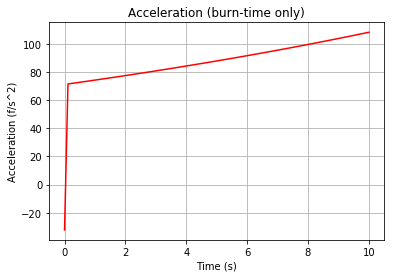

In [ ]:
burnTime = 10  # seconds
totalTime = 110.0 # seconds
totalSteps = 1000
burnSteps = int(burnTime/totalTime*totalSteps)
burnTimeLinspace = np.linspace(0,burnTime,burnSteps)
totalTimeLinspace = np.linspace(0,totalTime,totalSteps)
acc = np.zeros([totalSteps]);
vel = np.zeros([totalSteps]);
pos = np.zeros([totalSteps]);

pos[0] = 2066;
acc[0] = -32.174;

for i in range(1,burnSteps):
    burningBool = True
    [acc[i], vel[i], pos[i]] = physStep((i-1)*burnTime/burnSteps,i*burnTime/burnSteps,acc[0],vel[i-1],pos[i-1], burningBool);


for i in range(burnSteps,totalSteps):
    burningBool = False
    [acc[i], vel[i], pos[i]] = physStep((i-1)*totalTime/coastSteps,i*totalTime/coastSteps,acc[0],vel[i-1],pos[i-1], burningBool);

print('Max Velocity =', np.max(vel))
print('Max Altitude =', np.max(pos))
    
plt.figure(1)
plt.grid()
plt.title('Acceleration (burn-time only)')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (f/s^2)')
plt.plot(burnTimeLinspace,acc[0:burnSteps],'r')

plt.figure(2)
plt.grid()
plt.title('Velocity (burn-time only)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (f/s)')
plt.plot(burnTimeLinspace,vel[0:burnSteps],'r')

plt.figure(3)
plt.grid()
plt.title('Altitude (total time)')
plt.xlabel('Time (s)')
plt.ylabel('Altitude (feet)')
plt.plot(totalTimeLinspace,pos,'b')
plt.plot(burnTimeLinspace,pos[0:burnSteps],'r')
plt.plot([0,totalTime],[np.max(pos),np.max(pos)], 'k')
plt.show()